In [18]:
import pandas as pd
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
train_df = pd.read_csv('adult.data', names=columns)
test_df = pd.read_csv('adult.test', names=columns)


In [20]:
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
train_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [22]:
test_df.isnull().sum()

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64

In [23]:
test_df.dropna(inplace=True)

In [24]:
train_df["income"] = train_df["income"].str.strip().str.replace(".", "", regex=False)
test_df["income"]  = test_df["income"].str.strip().str.replace(".", "", regex=False)

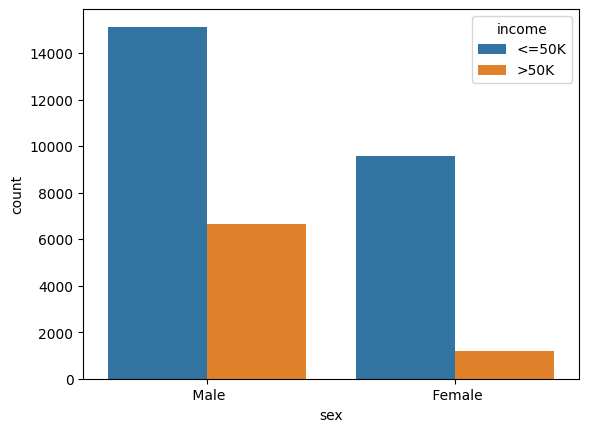

In [25]:
sns.countplot(x='sex' , hue='income' , data = train_df)
plt.show()

In [26]:
le = LabelEncoder()

train_df['income'] = le.fit_transform(train_df['income'])
test_df['income'] = le.transform(test_df["income"])

<Axes: >

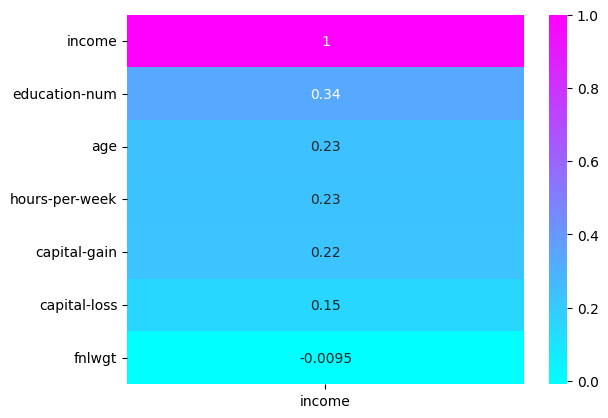

In [27]:
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr[['income']].sort_values(by = 'income' , ascending=False) , annot=True , cmap='cool')

In [28]:
train_df.drop('fnlwgt', axis = 1)
test_df.drop('fnlwgt' , axis = 1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,?,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0
16278,64,?,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0
16279,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0
16280,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0


In [29]:
train_df.shape , test_df.shape

((32561, 15), (16281, 15))

In [30]:
X_train = train_df.drop(columns='income')
y_train = train_df['income']

X_test = test_df.drop(columns='income')
y_test = test_df['income']

In [31]:
num_train_df = X_train.select_dtypes(exclude='object').columns
cat_train_df = X_test.select_dtypes(include='object').columns

In [32]:
num_train_df_pip = Pipeline([
    ('Fill Null' , SimpleImputer(strategy='mean')),
    ('Scale' , StandardScaler())
])

cat_train_df_pip = Pipeline([
    ('Fill Null' , SimpleImputer(strategy='most_frequent')),
    ('Encode' , OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
df_pip = ColumnTransformer([
    ('Num Data' , num_train_df_pip , num_train_df),
    ('Cat Data' , cat_train_df_pip , cat_train_df)
])

In [34]:
models_pip = {
    'Random Forest':RandomForestClassifier(random_state=42),
    'SVM' : SVC(random_state=42),
    'XG' : XGBClassifier(random_state=42),
    'Logistic' : LogisticRegression(random_state=42),
    'Cat Boost' : CatBoostClassifier(random_state=42),
    'lgb' : LGBMClassifier(random_state=42)
}

In [35]:
# scores = []
# for name, model in models_pip.items():
#     model_pip = Pipeline ([
#         ('Data' , df_pip),
#         ('model' , model)
#     ])
#     model_pip.fit(X_train, y_train)
#     y_pred = model_pip.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     scores.append({'model':name,'acc':acc})

In [36]:
# pd.DataFrame(scores)

In [37]:
# param_grid = {
#     'model__num_leaves': [31, 50, 70],          # حجم الورق leaf size
#     'model__max_depth': [-1, 5, 10],            # عمق الشجرة
#     'model__learning_rate': [0.01, 0.05, 0.1],  # معدل التعلم
#     'model__n_estimators': [100, 200, 500]      # عدد الأشجار
# }

In [38]:
# lgb_pip = Pipeline([
#     ('Data' , df_pip),
#     ('model' , lgb.LGBMClassifier())
# ])
# grid = GridSearchCV(lgb_pip , param_grid=param_grid , cv=5 ,scoring='accuracy')
# grid.fit(X_train , y_train)

In [39]:
ll = Pipeline([
    ('data' , df_pip),
    ('model' , LGBMClassifier())
])

In [40]:
ll.fit(X_train , y_train)

Pipeline(steps=[('data',
                 ColumnTransformer(transformers=[('Num Data',
                                                  Pipeline(steps=[('Fill Null',
                                                                   SimpleImputer()),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('Cat Data',
                                                  Pipeline(steps=[('Fill Null',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model', LGBMClassifier())])

In [41]:
y_pred = ll.predict(X_test)
accuracy_score(y_test,y_pred)*100

c:\Users\bisho\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


87.40863583317979